In [746]:
## Hi this medical Cost Analysis proccess project

## import library

try:
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn import *
  from google.colab import files



except Exception as error:

      print("ERROR:",error)






In [747]:
## upload file


# uploaded = files.upload()


data= pd.read_csv('/content/insurance.csv')



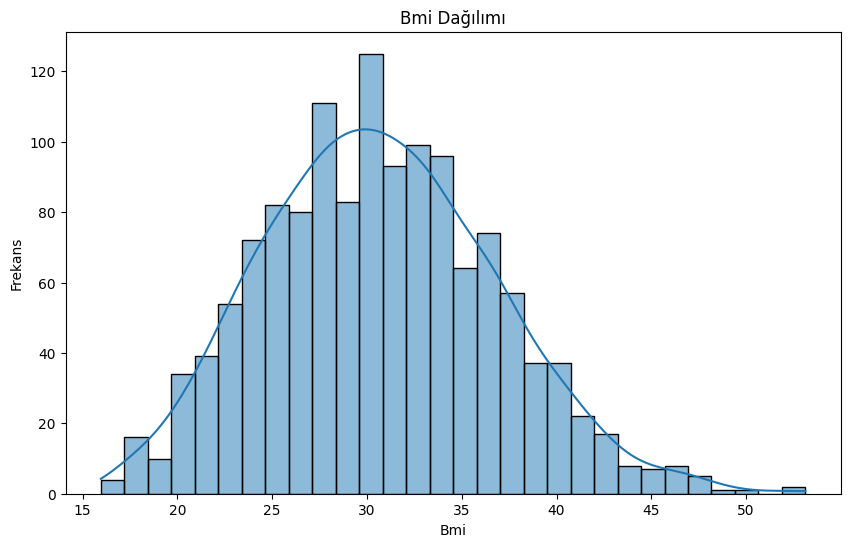

Bmi Ortalaması: 30.66339686098655


In [748]:
# okey start analsiys

#bmi

plt.figure(figsize=(10, 6))
sns.histplot(data["bmi"], bins=30, kde=True)
plt.title("Bmi Dağılımı")
plt.xlabel("Bmi")
plt.ylabel("Frekans")
plt.show()


##Zayıf (Underweight): 18.4 ve altı
#Normal Kilolu (Normal weight): 18.5 - 24.9
#Fazla Kilolu (Overweight): 25 - 29.9
#Obez (Obese): 30 ve üzeri

bmi_series = data['bmi']

# mean for bmi
bmi_mean = bmi_series.mean()

print("Bmi Ortalaması:", bmi_mean)



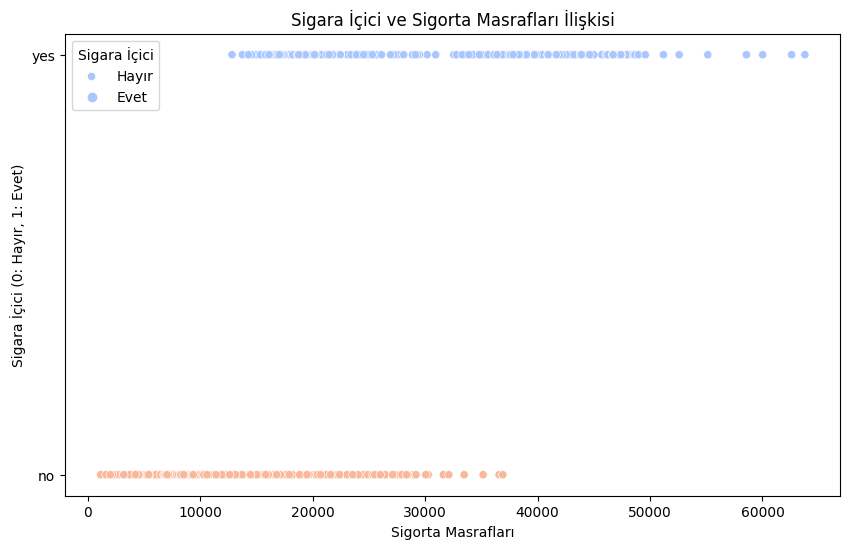

Sigara İçmeyenlerin Sigorta Masrafları Ortalaması: 8434.268297856202
Sigara İçenlerin Sigorta Masrafları Ortalaması: 32050.23183153285


In [749]:

# sigara içen ve sigorta masrafları ilişi

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='charges', y='smoker', hue='smoker', palette='coolwarm')
plt.title("Sigara İçici ve Sigorta Masrafları İlişkisi")
plt.xlabel("Sigorta Masrafları")
plt.ylabel("Sigara İçici (0: Hayır, 1: Evet)")
plt.legend(title='Sigara İçici', labels=['Hayır', 'Evet'])
plt.show()
smoker_charges_mean = data.groupby('smoker')['charges'].mean()

print("Sigara İçmeyenlerin Sigorta Masrafları Ortalaması:", smoker_charges_mean[0])
print("Sigara İçenlerin Sigorta Masrafları Ortalaması:", smoker_charges_mean[1])

#result: sigara içenler içmeyenlere göre   daha fazla sigorta masrafı var

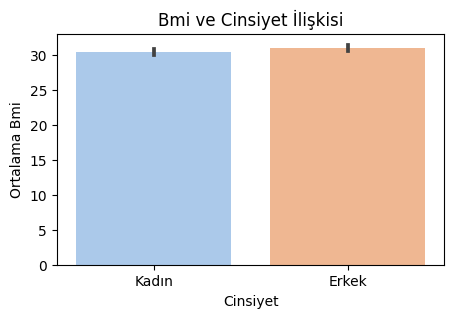

In [750]:
# Cinsiyet ve Bmi ilişkisini basit çubuk grafik ile görselleştirme
plt.figure(figsize=(5, 3))
sns.barplot(data=data, x='sex', y='bmi', palette='pastel')
plt.title("Bmi ve Cinsiyet İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Ortalama Bmi")
plt.xticks([0, 1], labels=['Kadın', 'Erkek'])
plt.show()

# result: bu dağılım ikisi arasında aynı oranda

In [751]:
# "children" sayısına göre gruplayarak en fazla çocuğa sahip "region"ı bulma
max_children_region = data.groupby('region')['children'].sum().idxmax()

print("En fazla çocuğa sahip bölge:", max_children_region)

# southeast bölgesi en çok çoğun olduğu bölge

En fazla çocuğa sahip bölge: southeast


<ipython-input-752-1bbdd62e13ca>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='age_group', y='bmi', ci=None, marker='o', color='blue')


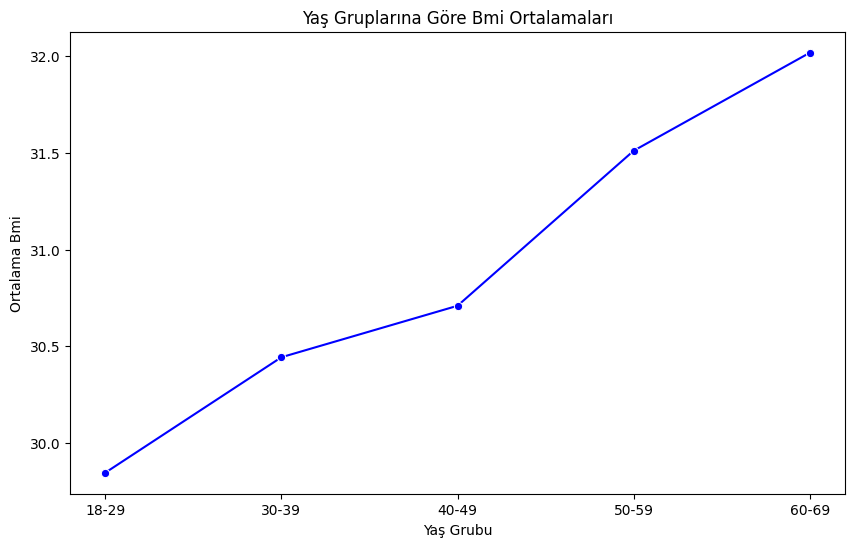

In [752]:
# yaş vücut kitle endeksi ilişkisi


# "age" ve "bmi" arasındaki ilişkiyi scatter plot ile görselleştirme
# Yaş gruplarını oluşturma
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Yaş gruplarına göre "bmi" değerlerinin ortalama grafiği
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='age_group', y='bmi', ci=None, marker='o', color='blue')
plt.title("Yaş Gruplarına Göre Bmi Ortalamaları")
plt.xlabel("Yaş Grubu")
plt.ylabel("Ortalama Bmi")
plt.show()

# result : özetle yaş ilerledikçe vücut kitle endeksi artıyor

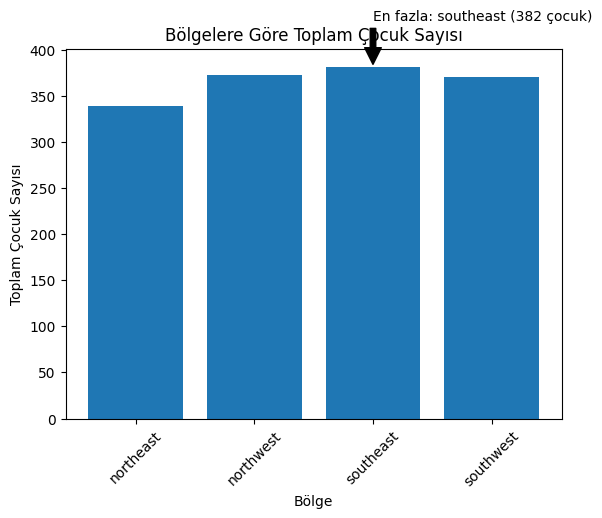

In [753]:
children_by_region = data.groupby('region')['children'].sum()

max_children_region = children_by_region.idxmax()
max_children_count = children_by_region.max()

# Görselleştirme
plt.bar(children_by_region.index, children_by_region)
plt.title("Bölgelere Göre Toplam Çocuk Sayısı")
plt.xlabel("Bölge")
plt.ylabel("Toplam Çocuk Sayısı")
plt.xticks(rotation=45)
plt.annotate(f"En fazla: {max_children_region} ({max_children_count} çocuk)",
             xy=(max_children_region, max_children_count),
             xytext=(max_children_region, max_children_count + 50),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

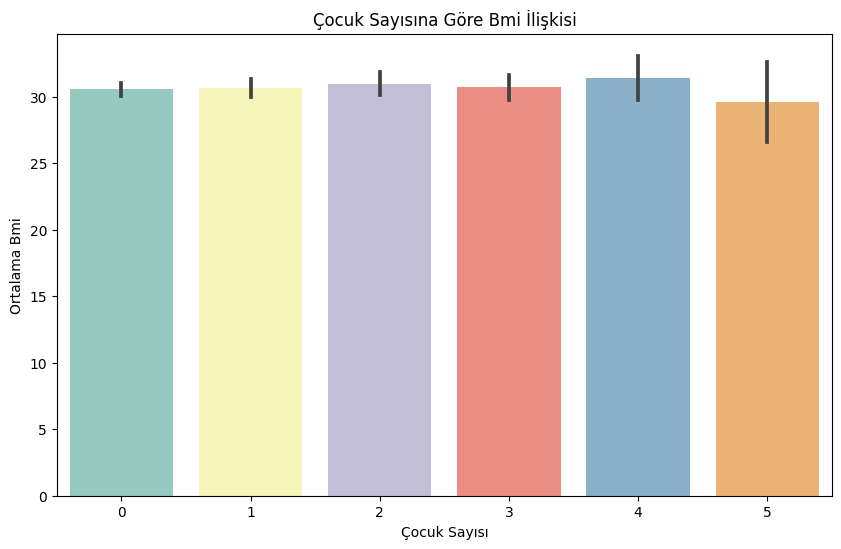

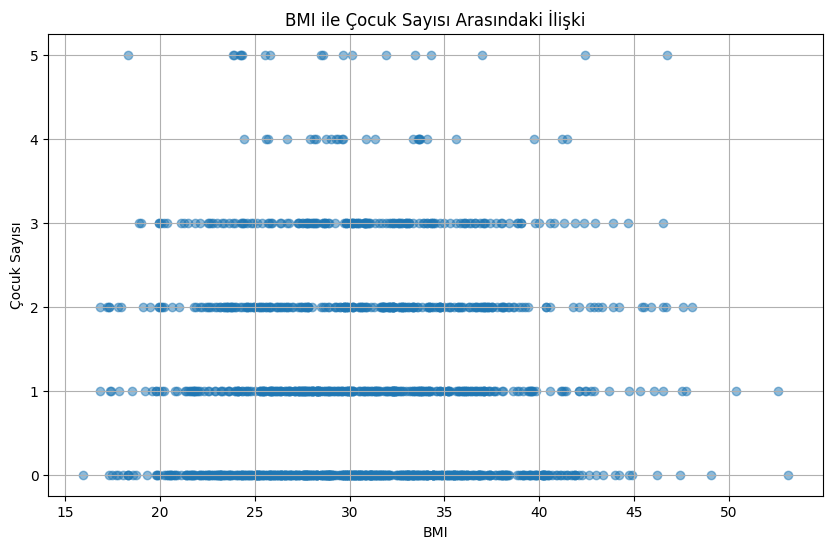

In [754]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='children', y='bmi', palette='Set3')
plt.title("Çocuk Sayısına Göre Bmi İlişkisi")
plt.xlabel("Çocuk Sayısı")
plt.ylabel("Ortalama Bmi")
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['children'], alpha=0.5)
plt.title('BMI ile Çocuk Sayısı Arasındaki İlişki')
plt.xlabel('BMI')
plt.ylabel('Çocuk Sayısı')
plt.grid(True)
plt.show()



In [755]:

z_scores = (data['bmi'] - data['bmi'].mean()) / data['bmi'].std()

# Z-Skoru yöntemine göre aykırı değerleri belirleme
outliers = data[abs(z_scores) > 3]

# Aykırı değerleri yazdırma
print("Aykırı Değerler (Z-Skoru Yöntemi):")
print(outliers[['bmi']])




Aykırı Değerler (Z-Skoru Yöntemi):
        bmi
116   49.06
847   50.38
1047  52.58
1317  53.13


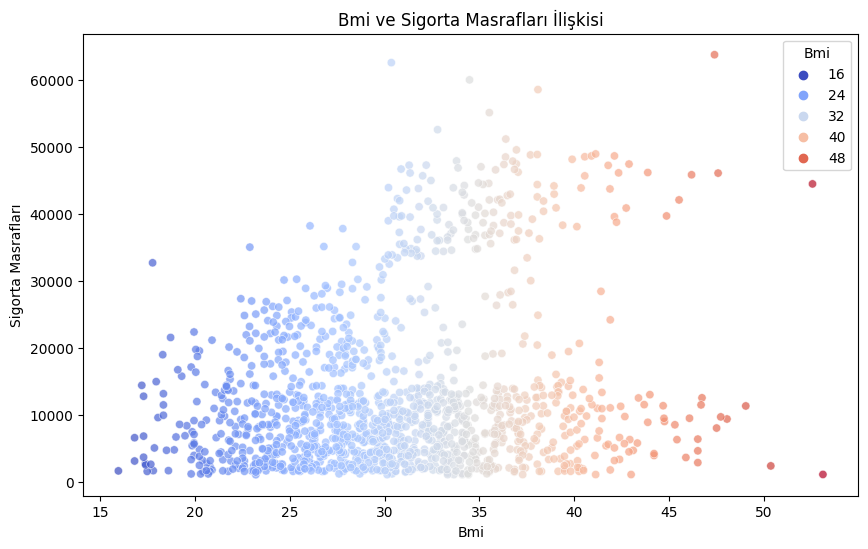

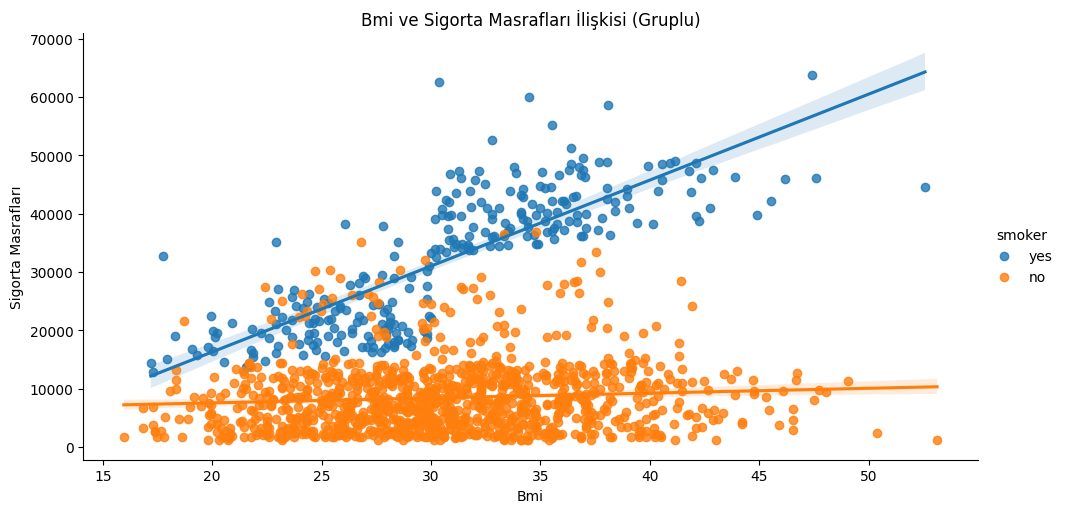

In [756]:
#bmi ve sigorta masrafları ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', palette='coolwarm', hue='bmi', alpha=0.7)
plt.title("Bmi ve Sigorta Masrafları İlişkisi")
plt.xlabel("Bmi")
plt.ylabel("Sigorta Masrafları")
plt.legend(title='Bmi')
plt.show()


# sağlık sigortası ve bmi endexi ilişkisi
bmi = data['bmi']
charges = data['charges']

# "bmi" ve "charges" arasındaki ilişkiyi gruplayarak görselleştirme
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker', aspect=2)
plt.title("Bmi ve Sigorta Masrafları İlişkisi (Gruplu)")
plt.xlabel("Bmi")
plt.ylabel("Sigorta Masrafları")
plt.show()

# :) yeap eğer kilo almaya ve sigara içmeye   devam ederseniz  sağlık saraflarınız onunla  aynı  şekilde artmaya devam eder !!  ve diğer bağımsız değişkenlerde değerlendirilmeli


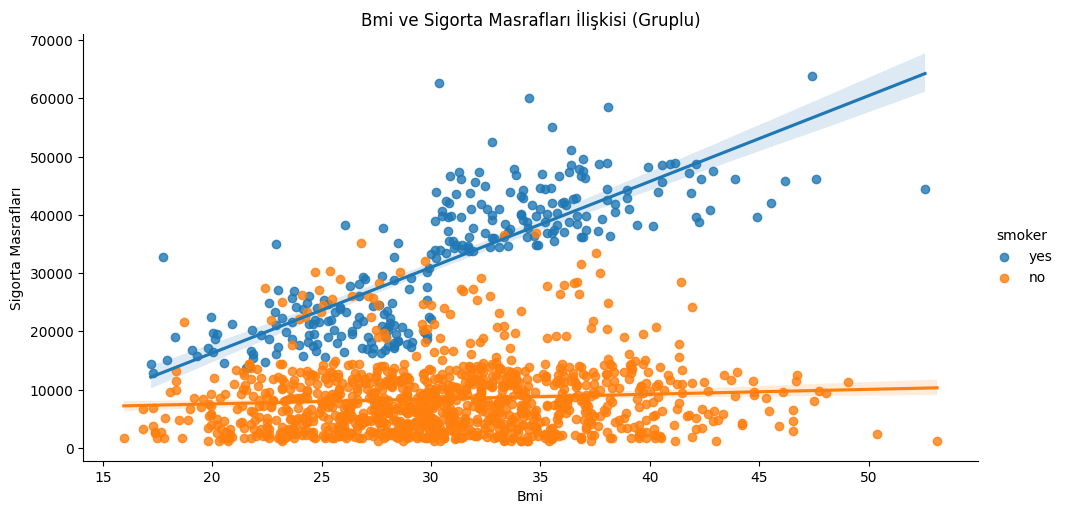

In [757]:
# sağlık sigortası ve bmi endexi ilişkisi # (extra) inceleme
bmi = data['bmi']
charges = data['charges']

# "bmi" ve "charges" arasındaki ilişkiyi gruplayarak görselleştirme
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker', aspect=2)
plt.title("Bmi ve Sigorta Masrafları İlişkisi (Gruplu)")
plt.xlabel("Bmi")
plt.ylabel("Sigorta Masrafları")
plt.show()

# :) yeap eğer kilo almaya ve sigara içmeye   devam ederseniz  sağlık saraflarınız onunla  aynı  şekilde artmaya devam eder !!  ve diğer bağımsız değişkenlerde değerlendirilmeli

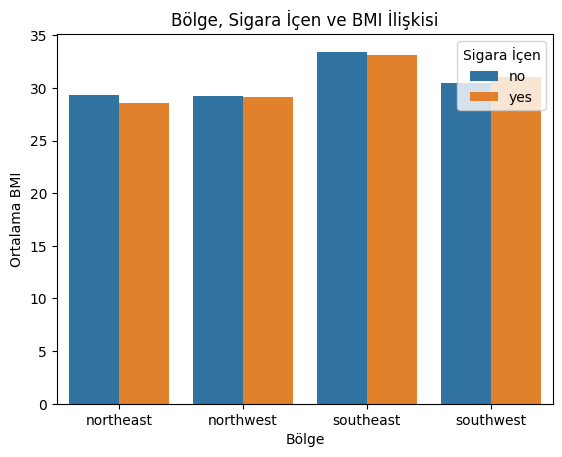

In [758]:
bmi_by_region_smoker = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

# Çubuk grafiği oluşturma
sns.barplot(data=bmi_by_region_smoker, x='region', y='bmi', hue='smoker')
plt.title("Bölge, Sigara İçen ve BMI İlişkisi")
plt.xlabel("Bölge")
plt.ylabel("Ortalama BMI")
plt.legend(title='Sigara İçen')
plt.show()

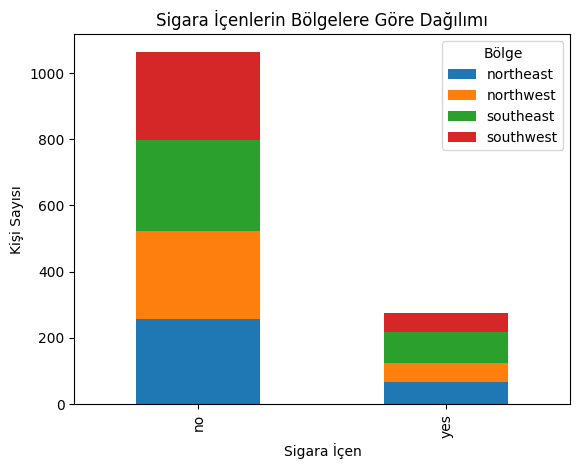

In [759]:
#grouped_data = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

# Sigara içen ve bölgelere göre gruplama
smoker_region = data.groupby(['smoker', 'region']).size().unstack()

# Görselleştirme
smoker_region.plot(kind='bar', stacked=True)
plt.title("Sigara İçenlerin Bölgelere Göre Dağılımı")
plt.xlabel("Sigara İçen")
plt.ylabel("Kişi Sayısı")
plt.legend(title='Bölge')
plt.show()


In [760]:

# # Group the data by 'region', 'smoker', and calculate the average 'bmi'
# grouped_data = data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

# # Pivot the data to make it suitable for plotting
# pivot_data = grouped_data.pivot(index='region', columns='smoker', values='bmi')

# # Create a grouped bar plot
# pivot_data.plot(kind='bar', figsize=(10, 6))
# plt.title("Relationship between Region, Smoker, and BMI")
# plt.xlabel("Region")
# plt.ylabel("Average BMI")
# plt.legend(title="Smoker")
# plt.show()

In [761]:
### Değerlendirme

#### Bmi (Vücut Kitle İndeksi) dağılımını inceleyin :
###   Veri setinde dağılımı eşit şekilde yapılmış ve data seti bu yönden bakıldığında belirli bir yargıya eğilim göstermiyor.


## **Değerlendirme**

### ○ Bmi (Vücut Kitle İndeksi) dağılımını inceleyin :
    Veri setinde dağılımı eşit şekilde yapılmış ve data seti bu yönden bakıldığında belirli bir yargıya eğilim göstermiyor.
  

### ○ “Sigara içen” ile sigorta maliyetleri  arasındaki ilişkiyi :
    Sigara içen kişilerle sigara içmeyenler arasında ilişki   Sigara İçmeyenlerin Sigorta Masrafları Ortalaması: 8434.268297856202
    Sigara İçenlerin Sigorta Masrafları Ortalaması: 32050.23183153285
    yuvarlanırsa eğer yaklaşık olarak 2.5-3 kat daha fazla sigorta masrafları çıktığı gözlemlenir.

### ○ “Sigara içen” ile “bölge” arasındaki ilişki:
    southeast bölgesinin diğer bölgelere göre daha fazla sigara kullanıdğı orata çıkıyor.

### ○ “BMI” ile “cinsiyet” arasındaki ilişkisi:
    Bu veri setine göre kadın ve erkek arasında bariz bir bmi farkı olmadığı ortaya çıkıyor.


### ○ En çok "çocuk"un bulunduğu "bölgeyi" bulun.
    enfazla çocuk southeast bölgeside buluyor 382 çocuk


### ○ “Yaş” ile “BMI” arasındaki ilişkiyi inceleyin

    yaş ile bmi (artışı) arasında doğrusal bir ilişki olduğu gözelmleniyor.Yaş arttıkça bmi obeziteye doğru ilerliyor.


### ○ “BMI” ile “çocuklar” arasındaki ilişkiyi inceleyin.

    Burada 0 ve 3 çocuğa sahip kişilerin bu data setinde ağırlıklı olduğunu ve bu durumun sağlık sigortalarına ağırlık değerinin daha fazla etki edebilir.

### ○ "BMI" değişkeninde aykırı değer var mı? Gözden geçirin.

            Aykırı Değerler (Z-Skoru Yöntemi):
              bmi
      116   49.06
      847   50.38
      1047  52.58
      1317  53.13 bu satırdaki veriler aykırı değer yarattığı tespit edildi. bunlar kaldırılabilir


### ○ “BMI” ile sigorta masrafları  arasındaki ilişkiyi inceleyin.

    Bmi sigorta masrafı ilşkisi bakıldığında büyük çoğunluğu 0 1500 dolar arasında fakat  bmi arttıkça daha fazla sigorta masrafı görünüyor



### ○ Çubuk grafiğini kullanarak “bölge”, “sigara içen” ve “bmi” arasındaki ilişkiyi inceleyin.
    


    Sigara içemekle içmemek arasında bmi arasında doğrudan bir korelasyon bulunmamaktadır.Souteast  obezite yakınlık sapanmaktadır.
    






In [762]:
print(data.head())
# Veri Normalizasyonu (Min-Max Ölçeklendirme)
scaler = MinMaxScaler()
numerical_cols = ['bmi', 'children']


data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Label Encoding işlemleri
label_cols = ['sex', 'smoker', 'region']
label_encoder = LabelEncoder()

for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])



#kategorik verielrin düzenlenmesi
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

data = data.drop('age', axis=1)
data.head()




   age     sex     bmi  children smoker     region      charges age_group
0   19  female  27.900         0    yes  southwest  16884.92400     18-29
1   18    male  33.770         1     no  southeast   1725.55230     18-29
2   28    male  33.000         3     no  southeast   4449.46200     18-29
3   33    male  22.705         0     no  northwest  21984.47061     30-39
4   32    male  28.880         0     no  northwest   3866.85520     30-39


,sex,bmi,children,smoker,region,charges,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69
0,0,0.321227,0.0,1,3,16884.92400,0,0,0,0
1,1,0.479150,0.2,0,2,1725.55230,0,0,0,0
2,1,0.458434,0.6,0,2,4449.46200,0,0,0,0
3,1,0.181464,0.0,0,1,21984.47061,1,0,0,0
4,1,0.347592,0.0,0,1,3866.85520,1,0,0,0


In [763]:
from sklearn.feature_selection import SelectKBest, f_regression

# Veri setini özellikler (X) ve bağımlı değişken (y) olarak ayrıştıralım
X = data.drop('charges', axis=1)
X= data.drop('region',axis=1)# en iyi özellikler de region dikkate alarak region alanını temizledim.
y = data['charges']

# En iyi özellik sayısını belirleyelim, örneğin 3 özellik seçeceğiz
k_best_features = 3

# SelectKBest ve f_regression kullanarak en iyi özellikleri seçelim
selector = SelectKBest(score_func=f_regression, k=k_best_features)
X_new = selector.fit_transform(X, y)

# Hangi özelliklerin seçildiğini görelim
selected_features = X.columns[selector.get_support()]

print("En iyi özellikler:", selected_features)


##  En iyi özellikler: Index(['bmi', 'smoker', 'age_group_60-69'], dtype='object')
## eğer sonuçlar iyi gelmezse kolon silip tekrar modeli train edeceğiz

En iyi özellikler: Index(['smoker', 'charges', 'age_group_60-69'], dtype='object')


In [764]:
# Modeli oluşturun ve eğitinregion
model = LinearRegression()
model.fit(X_train, y_train)

# Eğitilen modelle tahmin yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata LinearRegreyonu (MSE):", mse)

Ortalama Kare Hata LinearRegreyonu (MSE): 0.008335516908251536


In [765]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Regresyonu MSE:", mse)

Decision Tree Regresyonu MSE: 0.008388599530558353


In [766]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Regresyonu MSE:", mse)


Gradient Boosting Regresyonu MSE: 0.004689420277308127


In [767]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Veriyi standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Support Vector Regresyonu MSE:", mse)



Support Vector Regresyonu MSE: 0.009220100868313602


In [768]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Model seçimi
model = GradientBoostingRegressor()

# Hiperparametre aralıklarının belirlenmesi
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Grid Search oluşturma
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve modeli alma
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("En İyi Hiperparametreler:", best_params)

En İyi Hiperparametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [769]:

# En iyi hiperparametre değerleri
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

# Gradient Boosting Regresyon modelini oluşturma
model = GradientBoostingRegressor(learning_rate=best_params['learning_rate'],
                                  max_depth=best_params['max_depth'],
                                  n_estimators=best_params['n_estimators'])

# Modeli eğitme
model.fit(X_train, y_train)

# Test verilerini kullanarak tahmin yapma
y_pred = model.predict(X_test)

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Gradient Boosting Regresyonu MSE:", mse)

Gradient Boosting Regresyonu MSE: 0.004671380921779364
